<a href="https://colab.research.google.com/github/Shrushti-2002/Data-Analyst-Skill-Gap-Analyzer/blob/main/Data_Analyst_Skill_Gap_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Compare Resume Skills vs Job Requirements

In [64]:
!pip install PyPDF2
import re
import PyPDF2
from collections import Counter
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.1 MB/s eta 0:00:00


In [66]:
SKILL_LIBRARY = [
    "python", "sql", "excel", "power bi", "tableau",
    "data analysis", "data analytics", "data visualization",
    "machine learning", "statistics", "pandas", "numpy",
    "scikit-learn", "deep learning",
    "communication", "problem solving",
    "business intelligence", "dashboard",
    "etl", "data cleaning",
    "git", "github",
    "api", "fastapi",
    "prompt engineering", "generative ai",
    "nlp"
]

In [51]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

In [52]:
def extract_skills(text, skill_library):
    text = clean_text(text)
    extracted_skills = []

    for skill in skill_library:
        if skill in text:
            extracted_skills.append(skill)

    return list(set(extracted_skills))

In [69]:
job_description = """
We are looking for a Data Analyst with strong SQL and Python skills.
Experience with data visualization tools like Power BI or Tableau.
Knowledge of statistics, data cleaning, and business intelligence.
Experience with machine learning is a plus.
"""

In [55]:
resume_skills = extract_skills(resume_text, SKILL_LIBRARY)
job_skills = extract_skills(job_description, SKILL_LIBRARY)

print("Resume Skills:", resume_skills)
print("Job Required Skills:", job_skills)

Resume Skills: ['dashboard', 'sql', 'git', 'api', 'python', 'data cleaning', 'excel', 'data analysis', 'communication', 'power bi', 'machine learning']
Job Required Skills: ['business intelligence', 'sql', 'python', 'tableau', 'data visualization', 'statistics', 'data cleaning', 'power bi', 'machine learning']


In [56]:
def skill_gap_analysis(resume_skills, job_skills):
    matched_skills = list(set(resume_skills) & set(job_skills))
    missing_skills = list(set(job_skills) - set(resume_skills))
    extra_skills = list(set(resume_skills) - set(job_skills))

    return {
        "matched_skills": matched_skills,
        "missing_skills": missing_skills,
        "extra_skills": extra_skills
    }

In [57]:
analysis_result = skill_gap_analysis(resume_skills, job_skills)

analysis_result

{'matched_skills': ['sql',
  'python',
  'data cleaning',
  'power bi',
  'machine learning'],
 'missing_skills': ['business intelligence',
  'statistics',
  'tableau',
  'data visualization'],
 'extra_skills': ['dashboard',
  'git',
  'api',
  'excel',
  'data analysis',
  'communication']}

In [58]:
print("✅ Matched Skills:")
for skill in analysis_result["matched_skills"]:
    print("-", skill)

print("\n❌ Missing Skills (Skill Gap):")
for skill in analysis_result["missing_skills"]:
    print("-", skill)

print("\n➕ Additional Skills (Resume Advantage):")
for skill in analysis_result["extra_skills"]:
    print("-", skill)

✅ Matched Skills:
- sql
- python
- data cleaning
- power bi
- machine learning

❌ Missing Skills (Skill Gap):
- business intelligence
- statistics
- tableau
- data visualization

➕ Additional Skills (Resume Advantage):
- dashboard
- git
- api
- excel
- data analysis
- communication


In [59]:
matched_count = len(analysis_result["matched_skills"])
missing_count = len(analysis_result["missing_skills"])
extra_count = len(analysis_result["extra_skills"])

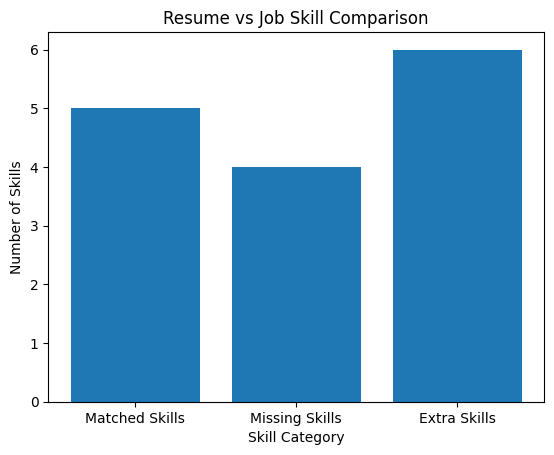

In [60]:
labels = ["Matched Skills", "Missing Skills", "Extra Skills"]
values = [matched_count, missing_count, extra_count]

plt.figure()
plt.bar(labels, values)
plt.title("Resume vs Job Skill Comparison")
plt.ylabel("Number of Skills")
plt.xlabel("Skill Category")
plt.show()

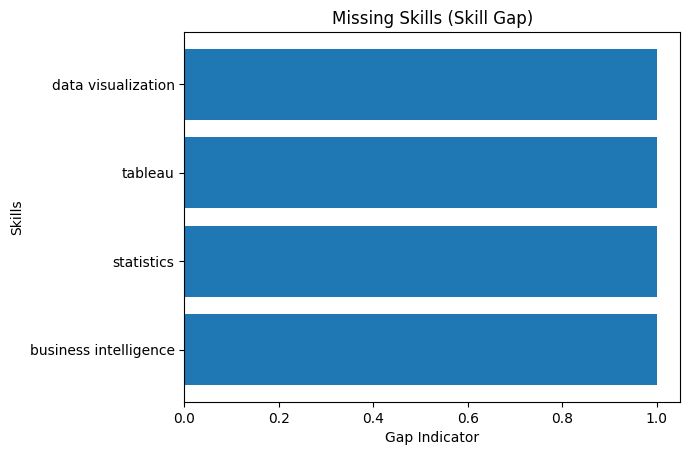

In [61]:
missing_skills = analysis_result["missing_skills"]

if missing_skills:
    plt.figure()
    plt.barh(missing_skills, [1] * len(missing_skills))
    plt.title("Missing Skills (Skill Gap)")
    plt.xlabel("Gap Indicator")
    plt.ylabel("Skills")
    plt.show()
else:
    print("🎉 No missing skills found!")

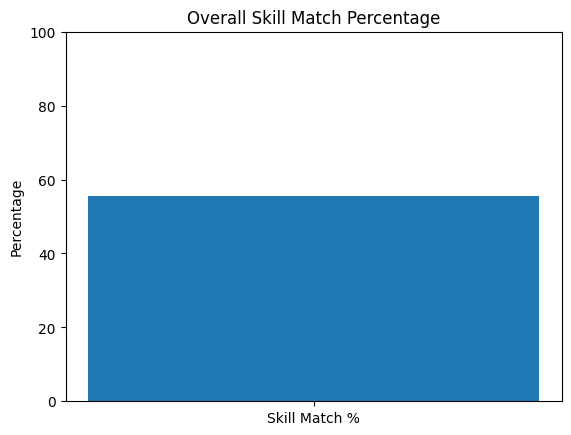

✅ Skill Match Percentage: 55.56%


In [62]:
total_required = len(job_skills)
match_percentage = (matched_count / total_required) * 100 if total_required > 0 else 0

plt.figure()
plt.bar(["Skill Match %"], [match_percentage])
plt.ylim(0, 100)
plt.title("Overall Skill Match Percentage")
plt.ylabel("Percentage")
plt.show()

print(f"✅ Skill Match Percentage: {match_percentage:.2f}%")

In [74]:
from google.colab import files

uploaded = files.upload()

Saving sample_data_analyst_resume.pdf to sample_data_analyst_resume.pdf


In [75]:
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

In [77]:
resume_text = extract_text_from_pdf("sample_data_analyst_resume.pdf")

print(resume_text[:1000])  # preview extracted text

ALEX MORGAN
Data Analyst
Email: alex.morgan@email.com
Location: India
PROFESSIONAL SUMMARY
Entry-level Data Analyst with strong analytical skills and hands-on experience in Python, SQL, and
data visualization. Passionate about transforming raw data into actionable insights and supporting
business decision-making.
TECHNICAL SKILLS
Python, SQL, Excel, Power BI, Pandas, NumPy, Data Cleaning, Exploratory Data Analysis, Basic
Machine Learning, Git, APIs
PROJECTS
Sales Data Analysis Dashboard
 Analyzed sales data using Python and SQL to identify trends and performance metrics.
 Built interactive dashboards using Power BI to visualize insights for stakeholders.
Customer Churn Analysis
 Developed a classification model to predict customer churn using Python.
 Performed data cleaning, feature engineering, and model evaluation.
EDUCATION
Bachelor of Science in Information Technology
SOFT SKILLS
Problem Solving, Communication, Analytical Thinking
TOOLS & TECHNOLOGIES
Python, SQL, Excel, Power